# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make API request
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | isafjordur
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | laguna
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | santiago de cao
Processing Record 7 of Set 1 | marsa alam
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | madimba
Processing Record 11 of Set 1 | usogorsk
Processing Record 12 of Set 1 | boende
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | talnakh
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | utrik
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | baijiantan
Processing Record 19 of Set 1 | hamilton
Processing Record 20 of Set 1 | mount isa
Processing Record 21 of Set 1 | saipan
Processing Record 22 of Set 1 | bethel
Processing Record

Processing Record 42 of Set 4 | devanhalli
Processing Record 43 of Set 4 | lackland air force base
Processing Record 44 of Set 4 | ketchikan
Processing Record 45 of Set 4 | mugia
Processing Record 46 of Set 4 | nemuro
Processing Record 47 of Set 4 | lesnoy
Processing Record 48 of Set 4 | selfoss
Processing Record 49 of Set 4 | egilsstadir
Processing Record 0 of Set 5 | cabedelo
Processing Record 1 of Set 5 | yanykurgan
Processing Record 2 of Set 5 | les cayes
Processing Record 3 of Set 5 | sisimiut
Processing Record 4 of Set 5 | pultusk
Processing Record 5 of Set 5 | kirkwall
Processing Record 6 of Set 5 | tamanrasset
Processing Record 7 of Set 5 | lompoc
Processing Record 8 of Set 5 | nevel'sk
Processing Record 9 of Set 5 | berriane
Processing Record 10 of Set 5 | east london
Processing Record 11 of Set 5 | mount gambier
Processing Record 12 of Set 5 | klyavlino
Processing Record 13 of Set 5 | minas de marcona
Processing Record 14 of Set 5 | port alfred
Processing Record 15 of Set 5 |

Processing Record 31 of Set 8 | ayaguz
City not found. Skipping...
Processing Record 32 of Set 8 | metlaoui
Processing Record 33 of Set 8 | devinuwara
City not found. Skipping...
Processing Record 34 of Set 8 | lihue
Processing Record 35 of Set 8 | antsiranana
Processing Record 36 of Set 8 | alotau
City not found. Skipping...
Processing Record 37 of Set 8 | chui
Processing Record 38 of Set 8 | cidreira
Processing Record 39 of Set 8 | berezovyy
Processing Record 40 of Set 8 | lamu
Processing Record 41 of Set 8 | swakopmund
Processing Record 42 of Set 8 | mchenry
Processing Record 43 of Set 8 | poxoreo
Processing Record 44 of Set 8 | labuan
Processing Record 45 of Set 8 | yemva
Processing Record 46 of Set 8 | kone
Processing Record 47 of Set 8 | arraial do cabo
Processing Record 48 of Set 8 | amanalco de becerra
Processing Record 49 of Set 8 | fuvahmulah
City not found. Skipping...
Processing Record 0 of Set 9 | kikwit
Processing Record 1 of Set 9 | mafinga
Processing Record 2 of Set 9 |

Processing Record 18 of Set 12 | arkalyk
Processing Record 19 of Set 12 | melfort
Processing Record 20 of Set 12 | china
Processing Record 21 of Set 12 | old saybrook
Processing Record 22 of Set 12 | lagodekhi
Processing Record 23 of Set 12 | mandera
Processing Record 24 of Set 12 | thunder bay
Processing Record 25 of Set 12 | port shepstone
Processing Record 26 of Set 12 | luang prabang
Processing Record 27 of Set 12 | galle
Processing Record 28 of Set 12 | hauterive
Processing Record 29 of Set 12 | sungai penuh
Processing Record 30 of Set 12 | vilyuysk
Processing Record 31 of Set 12 | zalingei
Processing Record 32 of Set 12 | khadan khak
Processing Record 33 of Set 12 | brookings
Processing Record 34 of Set 12 | olyokminsk
Processing Record 35 of Set 12 | choibalsan
Processing Record 36 of Set 12 | mccook
Processing Record 37 of Set 12 | sandnessjoen
Processing Record 38 of Set 12 | burang
Processing Record 39 of Set 12 | aq qayeh
City not found. Skipping...
Processing Record 40 of S

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,isafjordur,66.0755,-23.1240,276.89,88,18,1.18,IS,1717982446
1,albany,42.6001,-73.9662,289.77,81,86,0.45,US,1717982446
2,laguna,38.4210,-121.4238,306.18,37,0,4.12,US,1717982446
3,adamstown,-25.0660,-130.1015,295.46,75,100,5.65,PN,1717982446
4,port-aux-francais,-49.3500,70.2167,276.23,87,100,17.36,TF,1717982447


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,276.89,88,18,1.18,IS,1717982446
1,albany,42.6001,-73.9662,289.77,81,86,0.45,US,1717982446
2,laguna,38.4210,-121.4238,306.18,37,0,4.12,US,1717982446
3,adamstown,-25.0660,-130.1015,295.46,75,100,5.65,PN,1717982446
4,port-aux-francais,-49.3500,70.2167,276.23,87,100,17.36,TF,1717982447


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

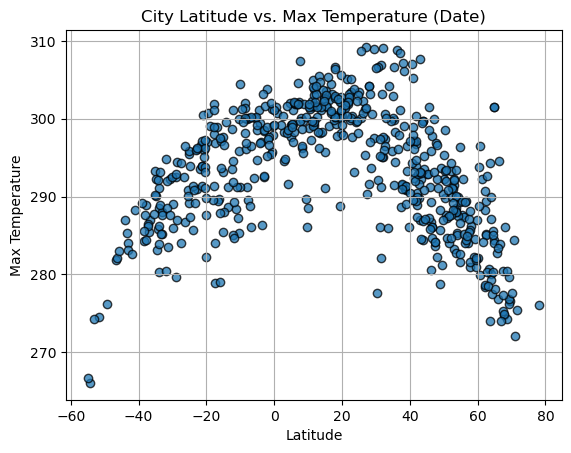

In [28]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

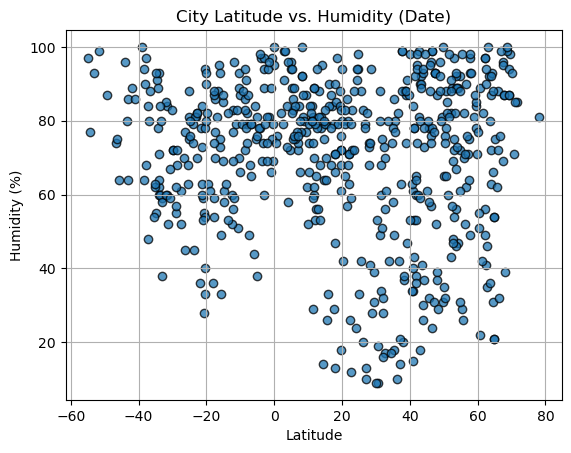

In [8]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

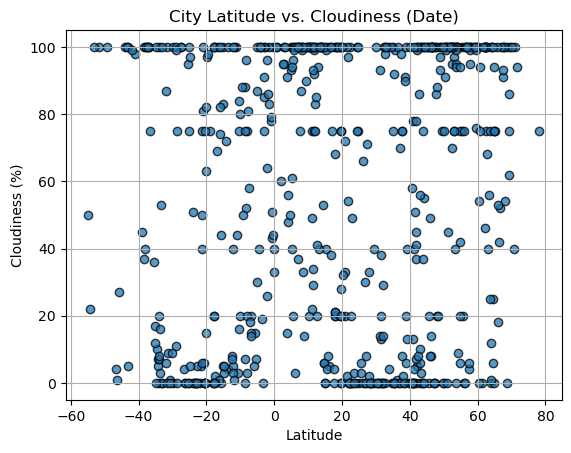

In [9]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

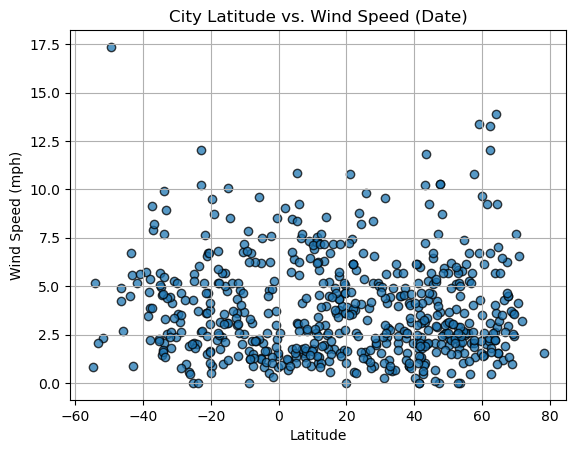

In [10]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# northern_hemi_df.head()
northern_df = city_data_df[city_data_df['Lat'] >= 0]
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,276.89,88,18,1.18,IS,1717982446
1,albany,42.6001,-73.9662,289.77,81,86,0.45,US,1717982446
2,laguna,38.4210,-121.4238,306.18,37,0,4.12,US,1717982446
6,marsa alam,25.0757,34.8918,303.41,33,0,5.36,EG,1717982170
10,usogorsk,63.4106,48.6872,280.74,92,56,2.26,RU,1717982449


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,adamstown,-25.0660,-130.1015,295.46,75,100,5.65,PN,1717982446
4,port-aux-francais,-49.3500,70.2167,276.23,87,100,17.36,TF,1717982447
5,santiago de cao,-7.9589,-79.2392,291.22,82,75,3.09,PE,1717982447
7,blackmans bay,-43.0167,147.3167,284.00,64,5,0.89,AU,1717982448
8,waitangi,-43.9535,-176.5597,286.94,96,100,4.47,NZ,1717982448


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7489249474958957


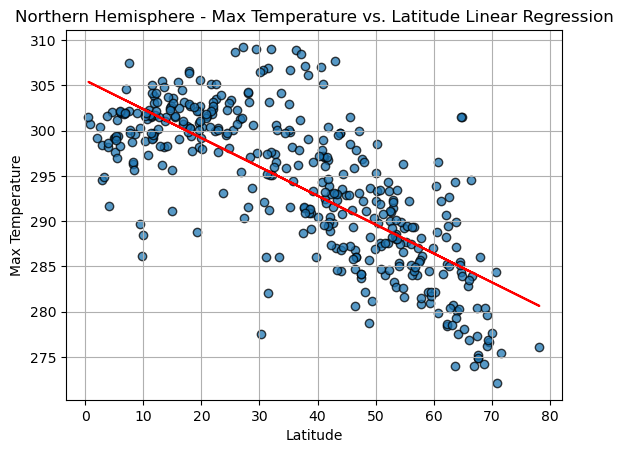

In [27]:
# Linear regression on Northern Hemisphere
# Filter the data for the Northern Hemisphere
northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"])

# Print the r-value in the console
print("The r-value is:", rvalue)

# Calculate the regression values
regress_values = northern_hemisphere_df["Lat"] * slope + intercept

# Plot the scatter plot
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"], marker="o", edgecolors="black", alpha=0.75)

# Plot the regression line
plt.plot(northern_hemisphere_df["Lat"], regress_values, "r-")

# Add linear regression equation and R-squared value
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
r_squared_text = f"R² = {round(rvalue**2, 2)}"
plt.annotate(line_eq, (0, 20), fontsize=15, color="red")
plt.annotate(r_squared_text, (0, 10), fontsize=15, color="red")

# Incorporate the other graph properties
plt.title("Northern Hemisphere - Max Temperature vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(True)

# Save the figure
plt.savefig("Northern_Hemisphere_Temperature_vs_Latitude.png")

# Show plot
plt.show()


The r-value is: 0.7006703651778915


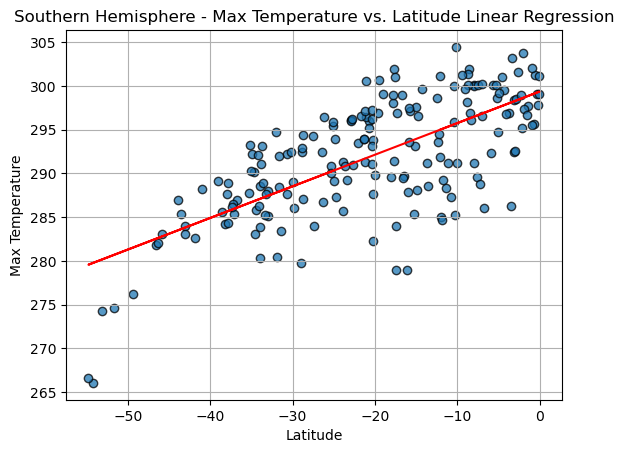

In [26]:
# Linear regression on Southern Hemisphere
# Filter the data for the Southern Hemisphere
southern_hemisphere_df = city_data_df[city_data_df["Lat"] < 0]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Max Temp"])

# Print the r-value in the console
print("The r-value is:", rvalue)

# Calculate the regression values
regress_values = southern_hemisphere_df["Lat"] * slope + intercept

# Plot the scatter plot
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Max Temp"], marker="o", edgecolors="black", alpha=0.75)

# Plot the regression line
plt.plot(southern_hemisphere_df["Lat"], regress_values, "r-")

# Add linear regression equation and R-squared value
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
r_squared_text = f"R² = {round(rvalue**2, 2)}"
plt.annotate(line_eq, (-50, 80), fontsize=15, color="red")
plt.annotate(r_squared_text, (-50, 70), fontsize=15, color="red")

# Incorporate the other graph properties
plt.title("Southern Hemisphere - Max Temperature vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(True)

# Save the figure
plt.savefig("Southern_Hemisphere_Temperature_vs_Latitude.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** The closer to the equator the higher the temeratures.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.01620052742518791


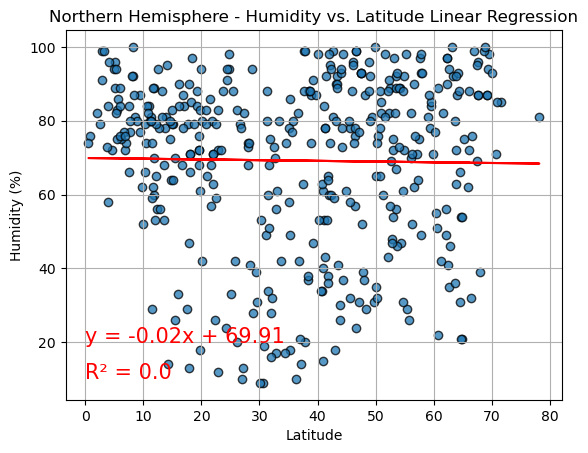

In [16]:
# Linear regression on Northern Hemisphere for Humidity vs. Latitude
# Filter the data for the Northern Hemisphere
northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"])

# Print the r-value in the console
print("The r-value is:", rvalue)

# Calculate the regression values
regress_values = northern_hemisphere_df["Lat"] * slope + intercept

# Plot the scatter plot
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"], marker="o", edgecolors="black", alpha=0.75)

# Plot the regression line
plt.plot(northern_hemisphere_df["Lat"], regress_values, "r-")

# Add linear regression equation and R-squared value
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
r_squared_text = f"R² = {round(rvalue**2, 2)}"
plt.annotate(line_eq, (0, 20), fontsize=15, color="red")
plt.annotate(r_squared_text, (0, 10), fontsize=15, color="red")

# Incorporate the other graph properties
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("Northern_Hemisphere_Humidity_vs_Latitude.png")

# Show plot
plt.show()


The r-value is: 0.04055112421051883


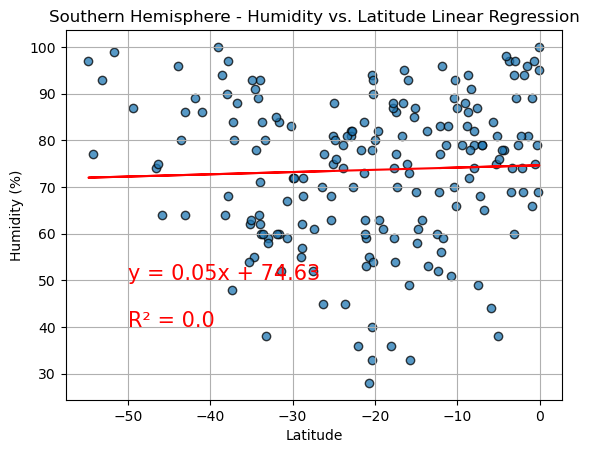

In [17]:
# Linear regression on Southern Hemisphere for Humidity vs. Latitude
# Filter the data for the Southern Hemisphere
southern_hemisphere_df = city_data_df[city_data_df["Lat"] < 0]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"])

# Print the r-value in the console
print("The r-value is:", rvalue)

# Calculate the regression values
regress_values = southern_hemisphere_df["Lat"] * slope + intercept

# Plot the scatter plot
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"], marker="o", edgecolors="black", alpha=0.75)

# Plot the regression line
plt.plot(southern_hemisphere_df["Lat"], regress_values, "r-")

# Add linear regression equation and R-squared value
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
r_squared_text = f"R² = {round(rvalue**2, 2)}"
plt.annotate(line_eq, (-50, 50), fontsize=15, color="red")
plt.annotate(r_squared_text, (-50, 40), fontsize=15, color="red")

# Incorporate the other graph properties
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("Southern_Hemisphere_Humidity_vs_Latitude.png")

# Show plot
plt.show()


**Discussion about the linear relationship:** There is more humidity in the northern hemisphere and they are kind of closer to the equator. The farthest away from the equator did not have a lot of hun=midity for both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05326652341395491


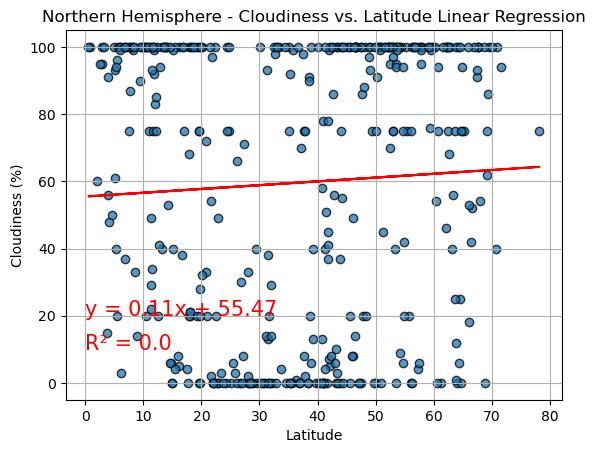

In [18]:
# Linear regression on Northern Hemisphere for Cloudiness vs. Latitude
# Filter the data for the Northern Hemisphere
northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"])

# Print the r-value in the console
print("The r-value is:", rvalue)

# Calculate the regression values
regress_values = northern_hemisphere_df["Lat"] * slope + intercept

# Plot the scatter plot
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.75)

# Plot the regression line
plt.plot(northern_hemisphere_df["Lat"], regress_values, "r-")

# Add linear regression equation and R-squared value
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
r_squared_text = f"R² = {round(rvalue**2, 2)}"
plt.annotate(line_eq, (0, 20), fontsize=15, color="red")
plt.annotate(r_squared_text, (0, 10), fontsize=15, color="red")

# Incorporate the other graph properties
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("Northern_Hemisphere_Cloudiness_vs_Latitude.png")

# Show plot
plt.show()


The r-value is: 0.043291234675176045


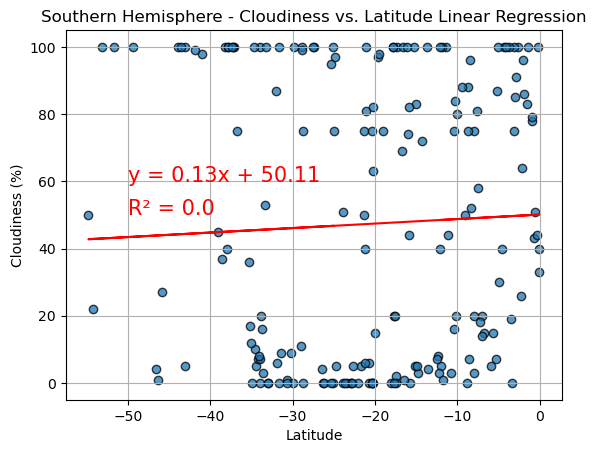

In [19]:
# Linear regression on Southern Hemisphere for Cloudiness vs. Latitude
# Filter the data for the Southern Hemisphere
southern_hemisphere_df = city_data_df[city_data_df["Lat"] < 0]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"])

# Print the r-value in the console
print("The r-value is:", rvalue)

# Calculate the regression values
regress_values = southern_hemisphere_df["Lat"] * slope + intercept

# Plot the scatter plot
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.75)

# Plot the regression line
plt.plot(southern_hemisphere_df["Lat"], regress_values, "r-")

# Add linear regression equation and R-squared value
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
r_squared_text = f"R² = {round(rvalue**2, 2)}"
plt.annotate(line_eq, (-50, 60), fontsize=15, color="red")
plt.annotate(r_squared_text, (-50, 50), fontsize=15, color="red")

# Incorporate the other graph properties
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("Southern_Hemisphere_Cloudiness_vs_Latitude.png")

# Show plot
plt.show()


**Discussion about the linear relationship:** For both hemispheres it is mostly very cloudy or not cloudy at all. For both hemispheres there is more cloud activity near the equator which matches the humidity.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.01418349597586719


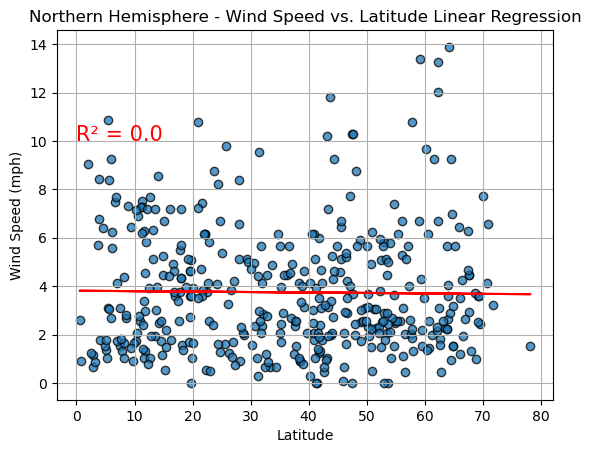

In [20]:
# Linear regression on Northern Hemisphere for Wind Speed vs. Latitude
# Filter the data for the Northern Hemisphere
northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"])

# Print the r-value in the console
print("The r-value is:", rvalue)

# Calculate the regression values
regress_values = northern_hemisphere_df["Lat"] * slope + intercept

# Plot the scatter plot
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.75)

# Plot the regression line
plt.plot(northern_hemisphere_df["Lat"], regress_values, "r-")

# Add linear regression equation and R-squared value
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
r_squared_text = f"R² = {round(rvalue**2, 2)}"
plt.annotate(line_eq, (0, 20), fontsize=15, color="red")
plt.annotate(r_squared_text, (0, 10), fontsize=15, color="red")

# Incorporate the other graph properties
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("Northern_Hemisphere_Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()


The r-value is: -0.15174576146148025


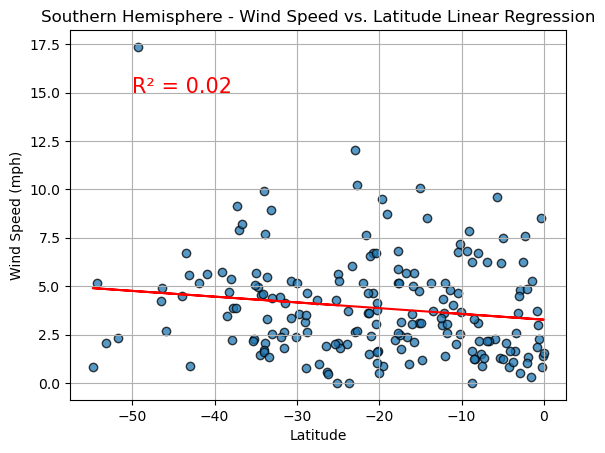

In [21]:
# Linear regression on Southern Hemisphere for Wind Speed vs. Latitude
# Filter the data for the Southern Hemisphere
southern_hemisphere_df = city_data_df[city_data_df["Lat"] < 0]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"])

# Print the r-value in the console
print("The r-value is:", rvalue)

# Calculate the regression values
regress_values = southern_hemisphere_df["Lat"] * slope + intercept

# Plot the scatter plot
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.75)

# Plot the regression line
plt.plot(southern_hemisphere_df["Lat"], regress_values, "r-")

# Add linear regression equation and R-squared value
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
r_squared_text = f"R² = {round(rvalue**2, 2)}"
plt.annotate(line_eq, (-50, 20), fontsize=15, color="red")
plt.annotate(r_squared_text, (-50, 15), fontsize=15, color="red")

# Incorporate the other graph properties
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("Southern_Hemisphere_Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()


**Discussion about the linear relationship:** The wind speed for both hemispheres are faster the closer to the poles, some halfway as well. Which makes sense why there are not as many clouds because of the wind.